In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
from __future__ import division
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

#### Let's analyze the stock performance of the top 4 American banks, and deep dive into Wells Fargo. Main focus would be to answer the below questions.

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    5.) What was the correlation between different stocks' daily returns?
    6.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior

In [3]:
# my list of stocks for analysis (Wells Fargo, JP Morgan, Bank of America and Citibank)
fin_list = ['WFC','JPM','BAC','C']

In [4]:
# lets set the start and end time
end = datetime.now()
start = datetime(end.year-1,end.month,end.day) # this allows my start date to be be 1 year earlier

In [5]:
# lets create a loop to fetch the stock data of my list from yahoo finance
for stock in fin_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end) # global takes the stock ticker and makes it a global variable

In [6]:
WFC.describe() # quick look at Wells Fargo stats

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,56.828577,55.784703,56.289012,56.264625,2.076485e+07,55.286775
std,3.536203,3.631840,3.568436,3.596397,9.323119e+06,3.326929
min,50.970001,50.020000,50.509998,50.189999,5.386500e+06,49.251652
25%,53.959999,52.860001,53.360001,53.259998,1.591830e+07,52.802807
50%,56.110001,55.049999,55.770000,55.560001,1.890530e+07,54.664478
75%,59.080002,58.200001,58.660000,58.630001,2.322010e+07,57.675026
max,66.309998,65.660004,65.889999,65.930000,1.033944e+08,64.058533


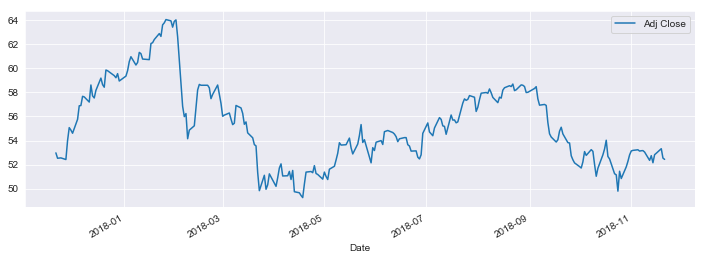

In [127]:
WFC['Adj Close'].plot(legend=True,figsize=(12,4))
plt.show() # A look at Wells Fargo's 1 year price trend.

##### Looks like stock prices for Wells Fargo has considerably decreased in a year. Is it because of the scandal?

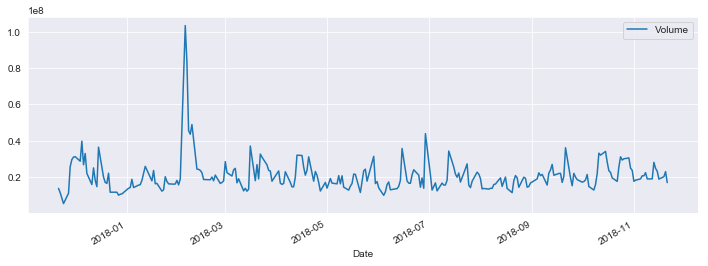

In [126]:
WFC['Volume'].plot(legend=True,figsize=(12,4)) # volume traded

##### The above shows visualizations for the closing price and the volume traded each day for Wells Fargo. Let's caculate the moving average for the stock.

###### For more info refer to the below links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

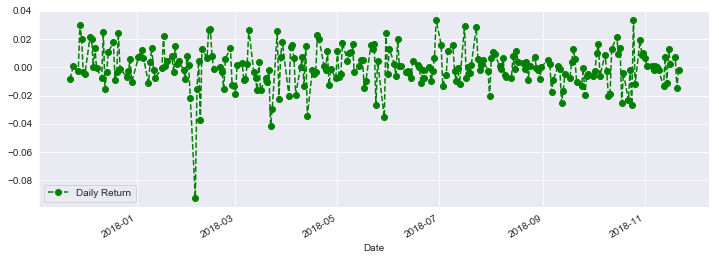

In [10]:
WFC['Daily Return'] = WFC['Adj Close'].pct_change()
WFC['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o',color='g')

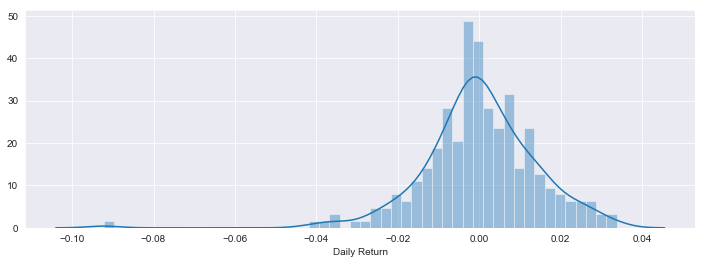

In [125]:
plt.figure(figsize = (12,4))
sns.distplot(WFC['Daily Return'].dropna(),bins=50)

##### Lets further analyze Wells Fargo on moving average prices for 10,20 and 50 day. To do that first lets isolate the clong price and add new columns with each moving average

In [12]:
# Isolate and picked only close
WFC_close = DataFrame(WFC.Close)

In [13]:
# added 3 columns wih moving averages using pandas rolling mean method
WFC_close['MA_10_days'] = WFC_close.Close.rolling(10).mean()
WFC_close['MA_20_days'] = WFC_close.Close.rolling(20).mean()
WFC_close['MA_50_days'] = WFC_close.Close.rolling(50).mean()

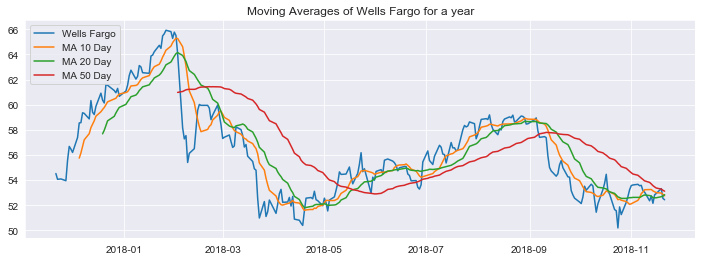

In [14]:
# lets plot it now
plt.figure(figsize=(12,4))
plt.grid(True)
plt.plot(WFC_close['Close'],label='Wells Fargo')
plt.plot(WFC_close['MA_10_days'],label='MA 10 Day')
plt.plot(WFC_close['MA_20_days'],label='MA 20 Day')
plt.plot(WFC_close['MA_50_days'],label='MA 50 Day')
plt.title('Moving Averages of Wells Fargo for a year')
plt.legend(loc=2)
plt.show()

#### Based on the above analysis, it shows that the stock is good for short term compared to long term

In [15]:
# calculate the change of proce to find the volatility, close divide by previous day close
WFC_close['change'] = np.log(WFC_close['Close']/WFC_close['Close'].shift())

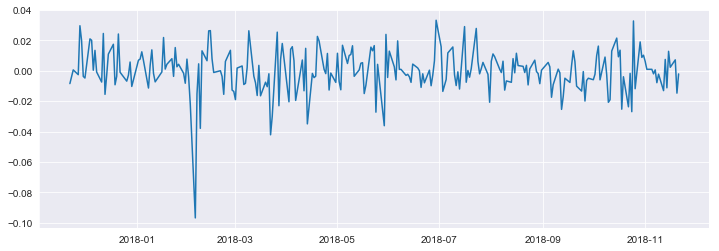

In [128]:
  plt.figure(figsize = (12,4))
plt.plot(WFC_close.change)

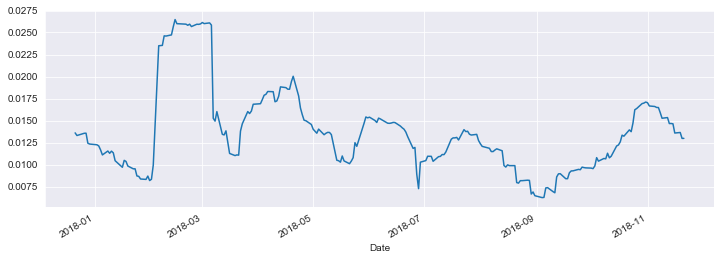

In [130]:
# 21 days of volatility using rolling std deviation
WFC_close['Volatility']=WFC_close.change.rolling(21).std()
WFC_close['Volatility'].plot(figsize=(12,4))

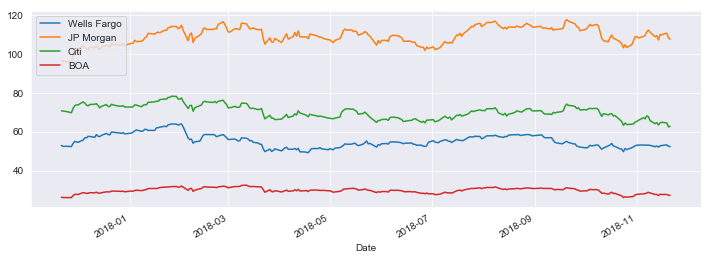

In [131]:
WFC['Adj Close'].plot(legend=True,figsize=(12,4))
JPM['Adj Close'].plot(legend=True,figsize=(12,4))
C['Adj Close'].plot(legend=True,figsize=(12,4))
BAC['Adj Close'].plot(legend=True,figsize=(12,4))
plt.legend(['Wells Fargo','JP Morgan','Citi', 'BOA'])

In [19]:
closing_df = DataReader(fin_list,'yahoo',start,end)['Adj Close'] # pulls only the adj close

In [20]:
closing_df.head()

Symbols,BAC,C,JPM,WFC
Date,,,,
2017-11-21,26.282124,70.811211,96.714226,52.972416
2017-11-22,26.213299,70.693810,96.430717,52.525475
2017-11-24,26.144470,70.459015,96.117889,52.554623
2017-11-27,26.144470,69.842667,95.736626,52.418594
2017-11-28,27.176878,72.102600,99.089813,53.992611


In [21]:
fin_rets = closing_df.pct_change()

In [22]:
fin_rets.head()

Symbols,BAC,C,JPM,WFC
Date,,,,
2017-11-21,NaN,NaN,NaN,NaN
2017-11-22,-0.002619,-0.001658,-0.002931,-0.008437
2017-11-24,-0.002626,-0.003321,-0.003244,0.000555
2017-11-27,0.000000,-0.008748,-0.003967,-0.002588
2017-11-28,0.039489,0.032357,0.035025,0.030028


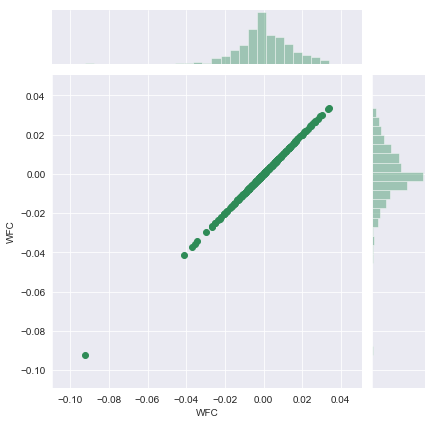

In [23]:
sns.jointplot('WFC','WFC',fin_rets,kind='scatter',color='seagreen')

##### Based on pearsonr linear correlation the daily return are perfectly alingned. 
##### Not a surprise as we are comparing the same stock.

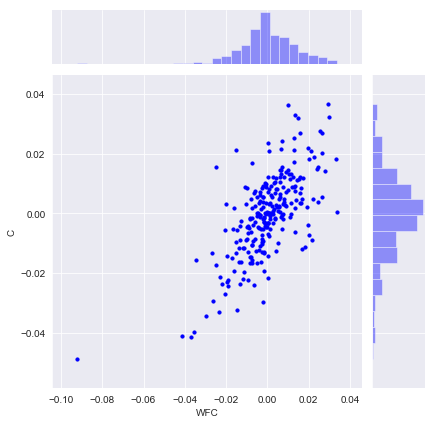

In [24]:
# Lets compare Wells Fargo with Citibank
sns.jointplot('WFC','C', fin_rets, kind='scatter', color='blue', s=10)
plt.show()

##### The above shows that WF and Citi are correlated to 0.4 which is considred a moderate correlation. The pearsonr value (officially known as the Pearson product-moment correlation coefficient) canprovide a sense of how correlated the daily percentage returns are.

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

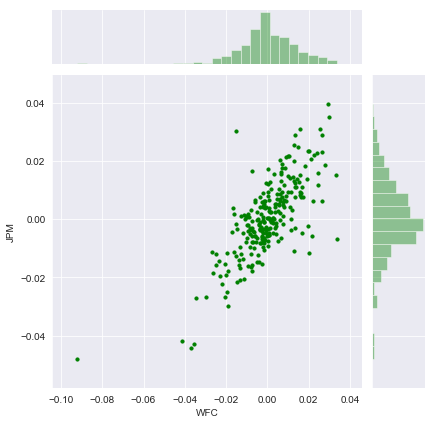

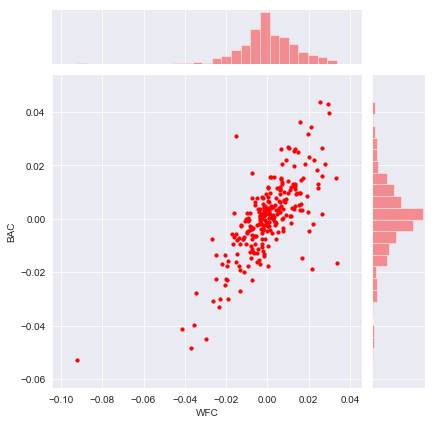

In [25]:
sns.jointplot('WFC','JPM', fin_rets, kind='scatter', color='g', s=10)
sns.jointplot('WFC','BAC', fin_rets, kind='scatter', color='r', s=10)
plt.show()

In [26]:
fin_rets.head()

Symbols,BAC,C,JPM,WFC
Date,,,,
2017-11-21,NaN,NaN,NaN,NaN
2017-11-22,-0.002619,-0.001658,-0.002931,-0.008437
2017-11-24,-0.002626,-0.003321,-0.003244,0.000555
2017-11-27,0.000000,-0.008748,-0.003967,-0.002588
2017-11-28,0.039489,0.032357,0.035025,0.030028


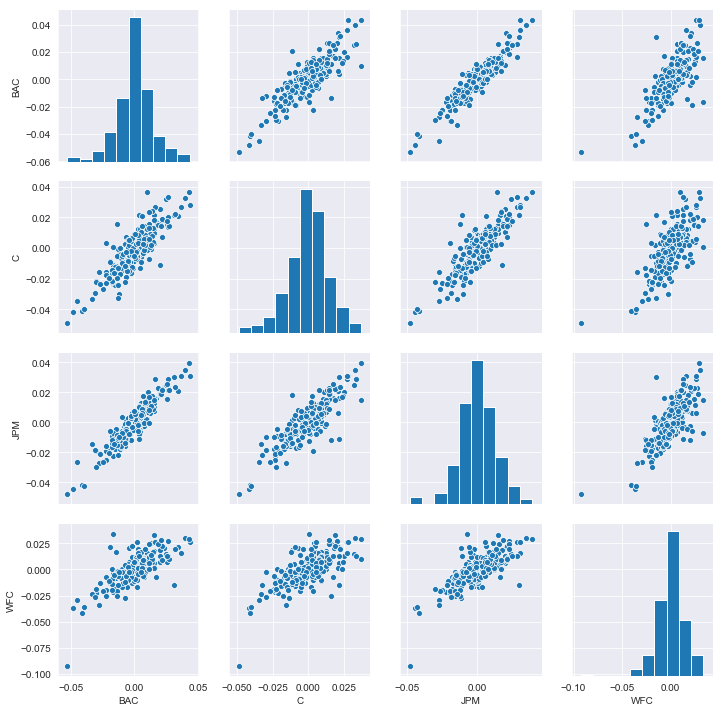

In [27]:
sns.pairplot(fin_rets.dropna())

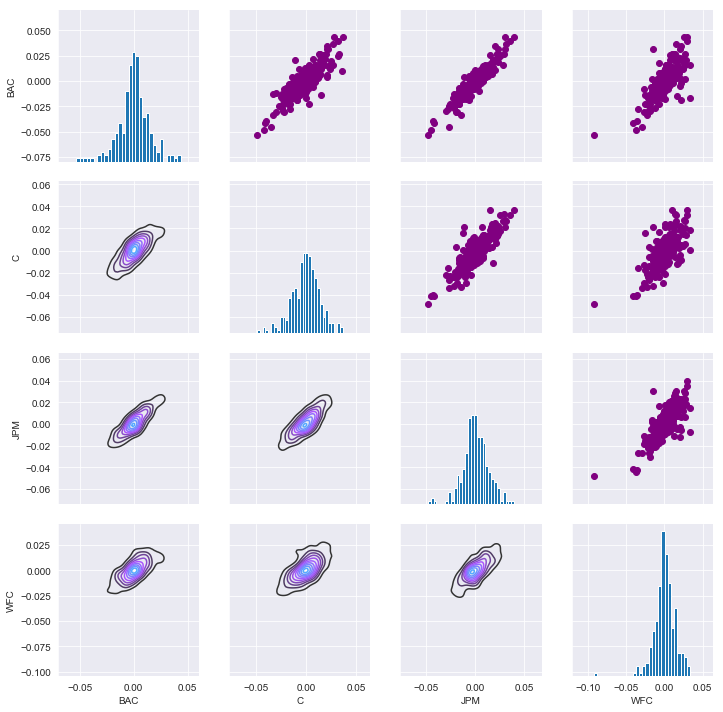

In [28]:
returns_fig = sns.PairGrid(fin_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

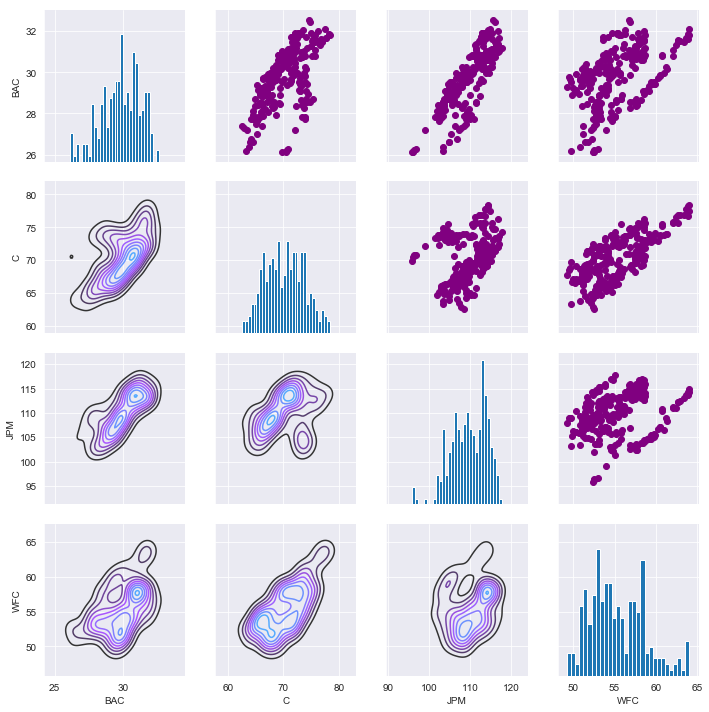

In [29]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

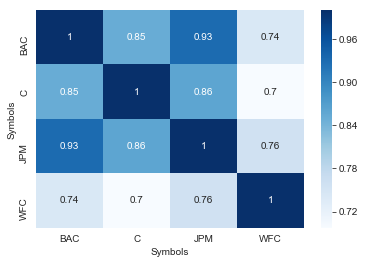

In [30]:
sns.heatmap(fin_rets.corr().dropna(),annot=True, cmap="Blues")

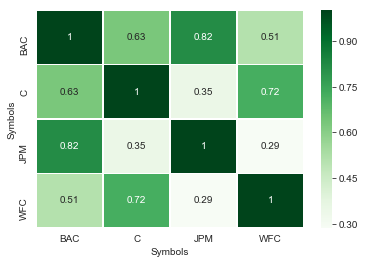

In [31]:
sns.heatmap(closing_df.corr().dropna(), annot=True, linewidths=0.5, cmap="Greens")

#### Based on the above analysis we could see here that Wells Fargo and Citibank have the strongest correlation of daily stock return. 

#### Let's now identify the risks for these stocks. There are several ways of doing it. One of the most basic is by comparing the expected return with the standard deviation of the daily returns. Lets start by creating a DataFrame of the returns

In [32]:
rets = fin_rets.dropna()

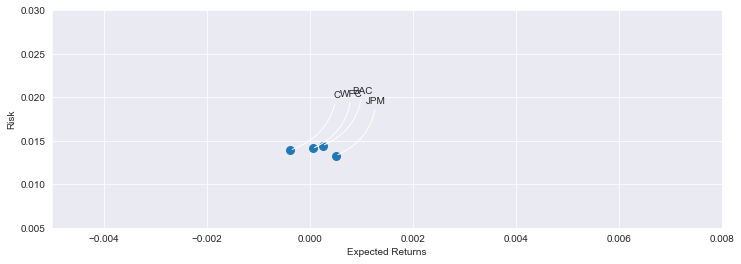

In [132]:
area = np.pi*20 # this is the create the area of the plot
plt.figure(figsize = (12,4))
plt.scatter(rets.mean(), rets.std(),s=area)
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
plt.xlim([-0.005,0.008])
plt.ylim([0.005,0.030])
# refer to the link http://matplotlib.org/users/annotations_guide.html for annotations

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

#### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Wells Fargo stock.

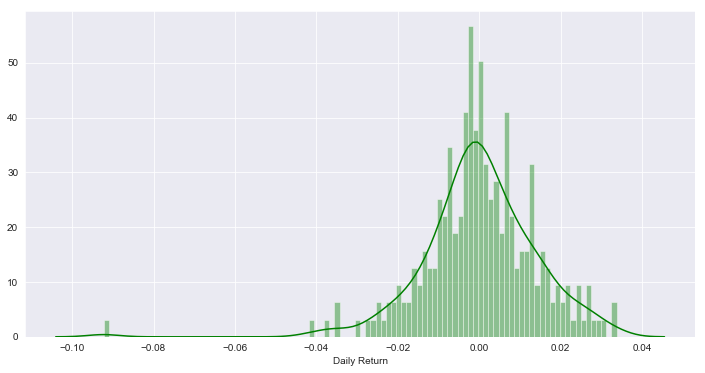

In [133]:
plt.figure(figsize = (12,6))
sns.distplot(WFC['Daily Return'].dropna(),bins=100, color='g')

In [77]:
rets.head()

Symbols,BAC,C,JPM,WFC
Date,,,,
2017-11-22,-0.002619,-0.001658,-0.002931,-0.008437
2017-11-24,-0.002626,-0.003321,-0.003244,0.000555
2017-11-27,0.000000,-0.008748,-0.003967,-0.002588
2017-11-28,0.039489,0.032357,0.035025,0.030028
2017-11-29,0.023155,0.018182,0.023382,0.019975


In [78]:
rets['WFC'].quantile(0.05) # this helps in forecast the risk of daily returns. 
#In this case the daily loss will not exceed above 2.1%(0.0211*100)

-0.02119369454469406

##### Wells Fargo daily loss will not exceed above 2.1%(0.0211*100) as of 22 Nov 2018

#### Let us now, look into the Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Wells Fargo DataFrame WFC

In [82]:
#Lets now put all of the above concept into the awesomeness of python!!!
#First define the variablesm then create the price, shock and drift
days = 365
dt = 1/days
mu = rets.mean()['WFC']
sigma = rets.std()['WFC']

In [83]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [84]:
WFC.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2017-11-21,54.580002,53.990002,54.080002,54.520000,13757000.0,52.972416,NaN
2017-11-22,54.619999,54.029999,54.459999,54.060001,11421700.0,52.525475,-0.008437
2017-11-24,54.310001,54.000000,54.189999,54.090000,5386500.0,52.554623,0.000555
2017-11-27,54.459999,53.860001,54.020000,53.950001,11066800.0,52.418594,-0.002588
2017-11-28,55.889999,53.720001,53.869999,55.570000,25685200.0,53.992611,0.030028


<Figure size 1152x432 with 0 Axes>

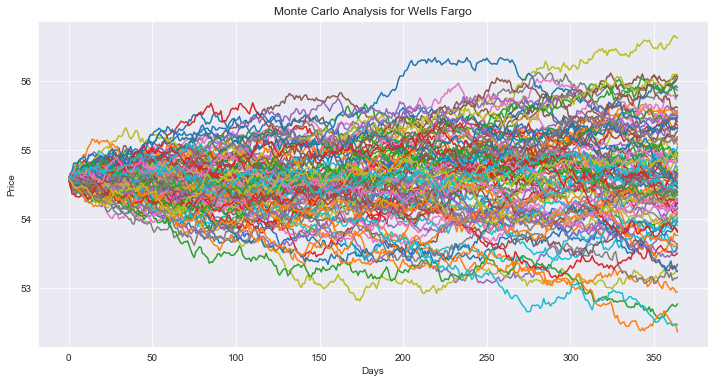

<Figure size 1152x432 with 0 Axes>

In [135]:
start_price = 54.58

plt.figure(figsize = (12,6))
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Wells Fargo')
plt.figure(figsize = (16,6))

In [87]:
runs = 1000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

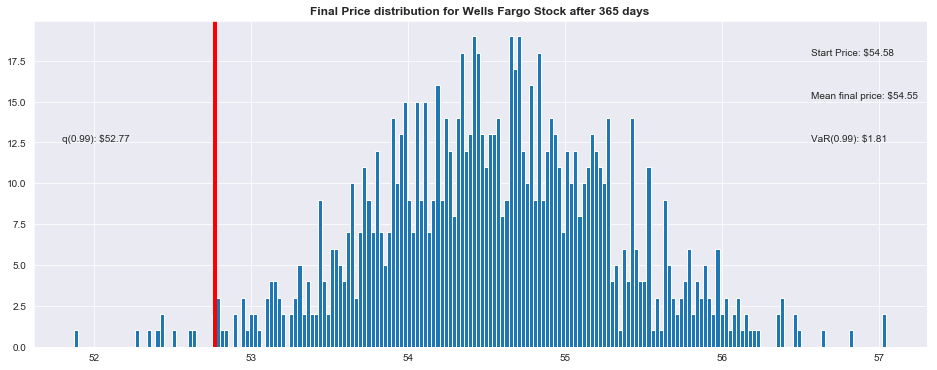

In [138]:
q = np.percentile(simulations,1)

plt.figure(figsize = (16,6))
plt.hist(simulations,bins=200)

plt.figtext(0.8,0.8, s='Start Price: $%.2f' %start_price) #starting price

plt.figtext(0.8,0.7, 'Mean final price: $%.2f' % simulations.mean()) #mean ending price

plt.figtext(0.8, 0.6, 'VaR(0.99): $%.2f' % (start_price - q,)) #variance of the price(within 99% confidence interval)

plt.figtext(0.15,0.6, 'q(0.99): $%.2f' % q) # display 1 % quantile

plt.axvline(x=q, linewidth=4, color='r') # plot a line at the 1% quantile result

plt.title(u'Final Price distribution for Wells Fargo Stock after %s days' % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for Wells Fargo stock, which looks to be $1.81 for every investment of 54.58.

This basically means 99% of the time investment is at a maximum risk of losing $1.81 per stock based on the monte carlo simulation method. Which really proves that it's stable stock.